In [97]:
# 实现一个简单的神经网络
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0) 

In [98]:
def load_coffee_data():
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [120]:
X,Y = load_coffee_data()

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)

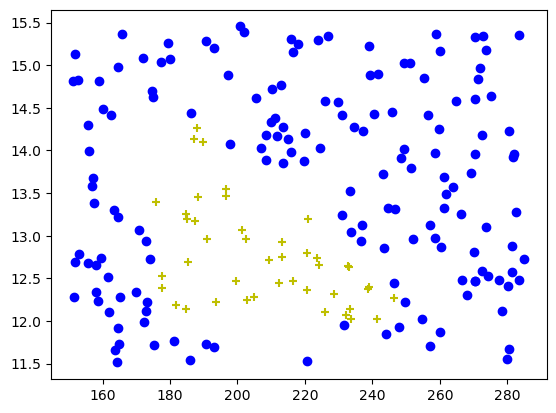

In [121]:
for i in range(Y.shape[0]):
    if Y[i] == 1:
        plt.scatter(X[i,0], X[i,1], c = "y" , marker='+')
    else:
        plt.scatter(X[i,0], X[i,1], c = "b" , marker='o')
plt.show()

In [100]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )
    g = 1.0/(1.0+np.exp(-z))

    return g

In [137]:
def dense(a_in, W, b, g):
    unites = W.shape[1]
    a_out = np.zeros(unites)
    for i in range(unites):
        w = W[:, i]
        z = np.matmul(w, a_in) + b[i]
        a_out[i] = g(z)
        
    return  a_out

In [138]:
def sequential(X, w1, b1, w2, b2):
    a1 = dense(X, w1, b1, sigmoid)
    a2 = dense(a1, w2, b2, sigmoid)
    
    return a2

In [139]:
# 获取参数
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,))
        ,
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
)

model.fit(
    Xn,Y,            
    epochs=1000,
)

# W1 = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
# b1 = np.array( [-9.82, -9.28,  0.96] )
# W2 = np.array( [[-31.18], [-27.59], [-32.56]] )
# b2 = np.array( [15.41] )
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5710
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5186
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4948
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4836
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4762
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4690
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4637
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4596
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4548
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4502
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4458
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4428
Epoch 13/1000
7/7 [==============================

In [140]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequential(X[i], W1, b1, W2, b2)
    return(p)

In [141]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example(int)(
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1, b1, W2, b2)

C:\Users\13226\AppData\Local\Temp\ipykernel_6180\1956934698.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = sequential(X[i], W1, b1, W2, b2)


In [136]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]
